In [1]:
import sys 
import os
sys.path.append(os.path.abspath("../src"))
from data_loading import load_data
from features import feature_engineering
from outliers import outliers
from eda import *
import pandas as pd


df = pd.read_csv("../data/diabetes_dataset.csv")
rows_before = len(df)
df = df.dropna()
df = df.drop_duplicates()
rows_after = len(df)
print(f"\nRows before : {rows_before}")
print(f"Rows after : {rows_after}")
print(f"Rows removed : {rows_before - rows_after}")




Rows before : 100000
Rows after : 100000
Rows removed : 0


In [2]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


#### The dataset does not contain any duplicates or missing values

In [3]:
valid_ranges = {
    'alcohol_consumption_per_week':       (0, 28),
    'physical_activity_minutes_per_week': (0, 900),
    'sleep_hours_per_day':                (3, 12),
    'screen_time_hours_per_day':          (0, 16),
    'bmi':                                (10, 50),
    'waist_to_hip_ratio':                 (0.5, 2.0),
    'systolic_bp':                        (80, 220),
    'diastolic_bp':                       (50, 130),
    'heart_rate':                         (30, 200),
    'cholesterol_total':                  (100, 400),
    'hdl_cholesterol':                    (20, 100),
    'ldl_cholesterol':                    (0, 250),
    'triglycerides':                      (30, 1000),
    'glucose_fasting':                    (50, 200),
    'glucose_postprandial':               (70, 300),
    'insulin_level':                      (2, 50),
    'hba1c':                              (4, 14),
    'diabetes_risk_score':                (0, 100),
}

iqr_outliers, range_outliers, df = outliers(df, valid_ranges)

print("\nIQR outlier counts (per column):")
print(iqr_outliers[iqr_outliers > 0])

print("\nValues outside realistic ranges:")
print(range_outliers[range_outliers > 0])


IQR outlier counts (per column):
alcohol_consumption_per_week           458
physical_activity_minutes_per_week    3199
sleep_hours_per_day                    900
screen_time_hours_per_day              305
bmi                                    744
waist_to_hip_ratio                     273
systolic_bp                            530
diastolic_bp                           731
heart_rate                             855
cholesterol_total                      309
hdl_cholesterol                        565
ldl_cholesterol                        349
triglycerides                          301
glucose_fasting                        745
glucose_postprandial                   634
insulin_level                          326
hba1c                                  618
diabetes_risk_score                    914
dtype: int64

Values outside realistic ranges:
screen_time_hours_per_day    4
ldl_cholesterol              1
dtype: int64


As we can see most of the outliers found fall into the reasonable range of each respective variable, and those that do not will just be removed.

# Feature engineering

We will transform variables like diet score, age, and BMI into categorical groups for better understanding. The diet score is continuous from 0 to 10, so we will divide it into integer categories. BMI will be grouped based on real-life obesity categories, and age will be divided into decades.We will also create new biomarker variables: TyG, HOMA-IR, QUICKI index, and AIP.

The biomarker formulas are:
##### TyG = ln((Tryglycerids * Glucose) / 2)
##### HOMA-IR = (Glucose * Insulin) / 405
##### QUICKI = 1 / (ln(Insulin) + ln(Glucose))
##### AIP = log10(Tryglycerids / HDL)




In [4]:
df = feature_engineering(df)

df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,diabetes_stage,diagnosed_diabetes,diet_score_level,age_group,bmi_category,activity_level,tyg_index,homa_ir,quicki_index,aip
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,Type 2,1,6,50-59,Obese,Moderate,9.196241,2.135704,0.147870,0.548584
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,No Diabetes,0,7,40-49,Normal,Low,7.240650,0.459259,0.191360,-0.263241
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,Type 2,1,7,50-59,Normal,Low,7.661056,1.477185,0.156396,-0.263241
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,Type 2,1,4,70+,Overweight,Low,9.182969,1.812148,0.151552,0.447158
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,Type 2,1,8,40-49,Normal,Low,9.302008,4.309580,0.133963,0.488117


# Visualization

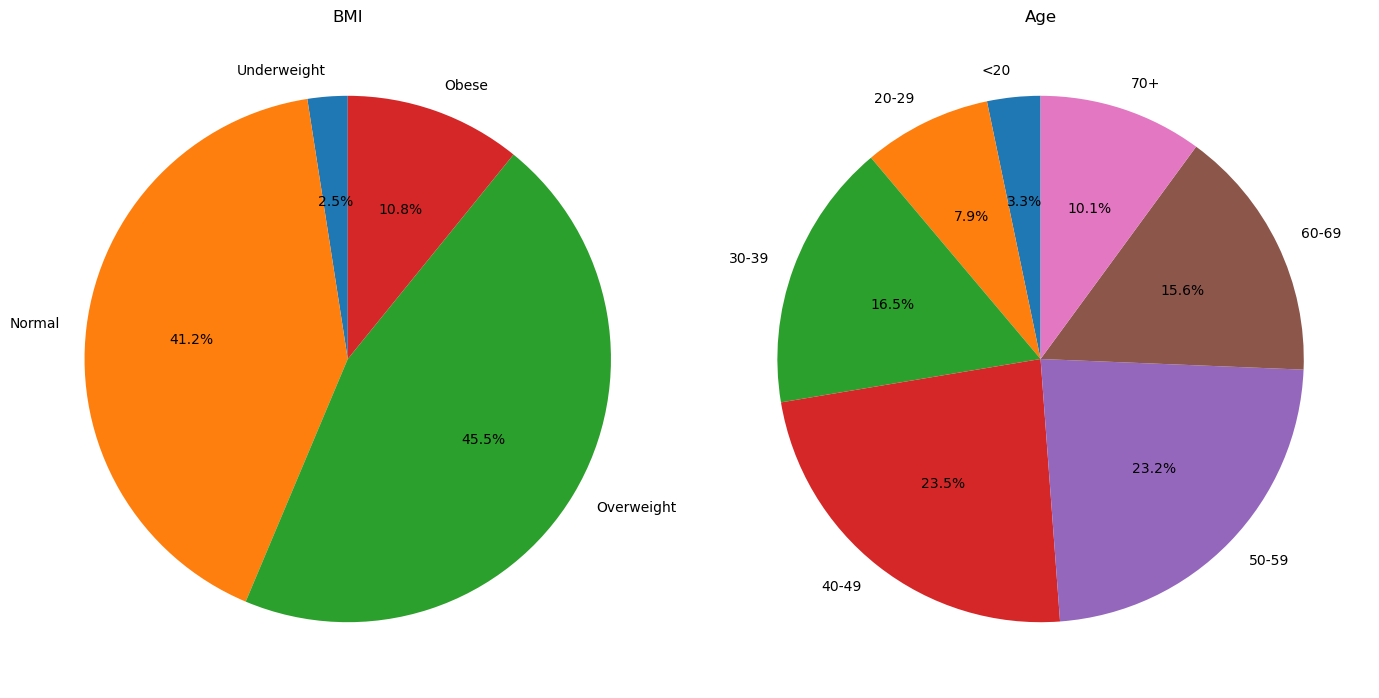

In [5]:
age_bmi_pie(df)

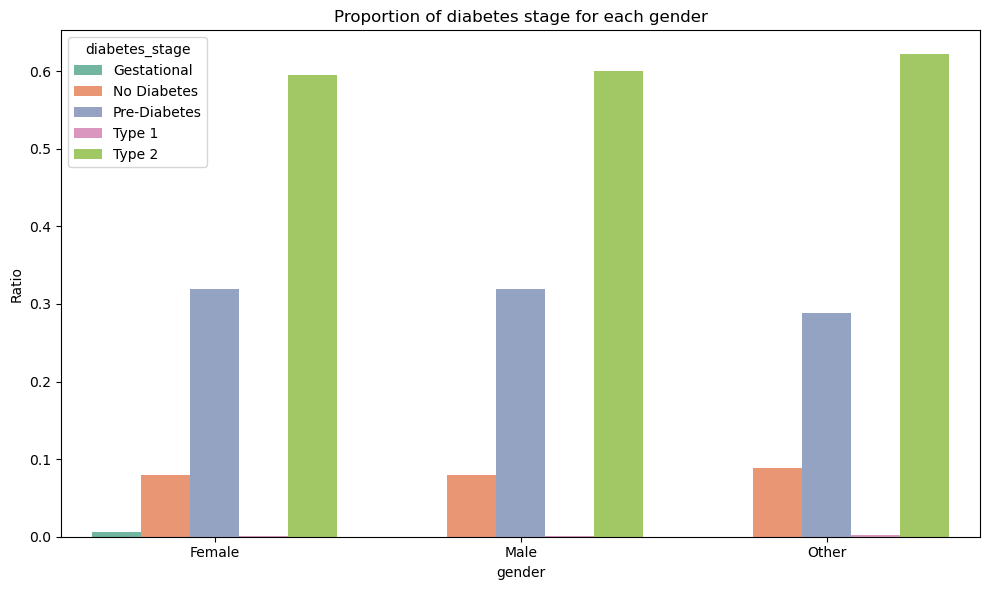

In [6]:
gender_diabetes_bar(df)

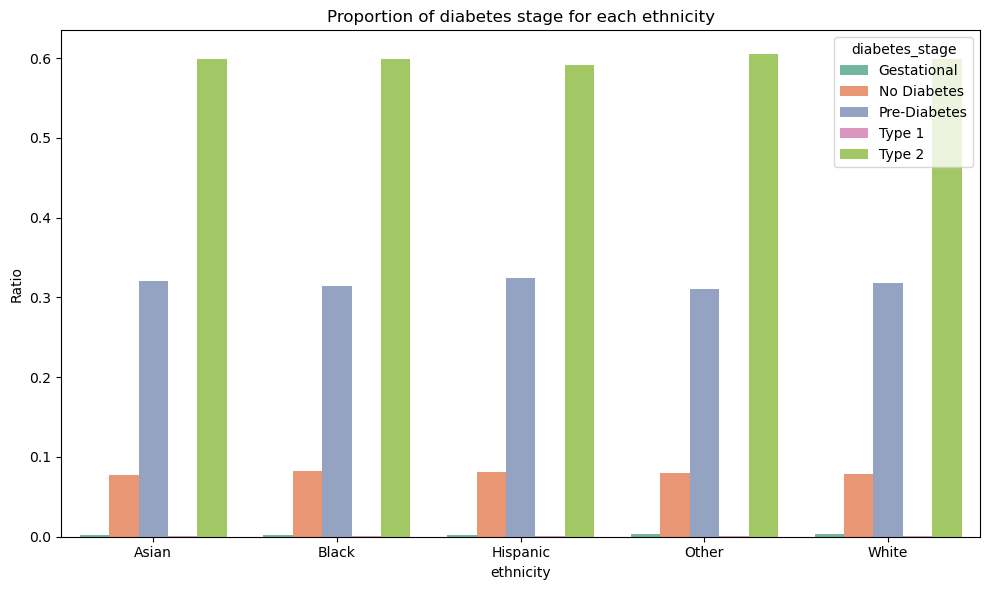

In [7]:
ethnicity_diabetes_bar(df)

Based on these two plots we can tell that diabetes distribution does not change based on gender or ethnicity. Only female patients have gestational diabetes since it only happens during pregnancy.

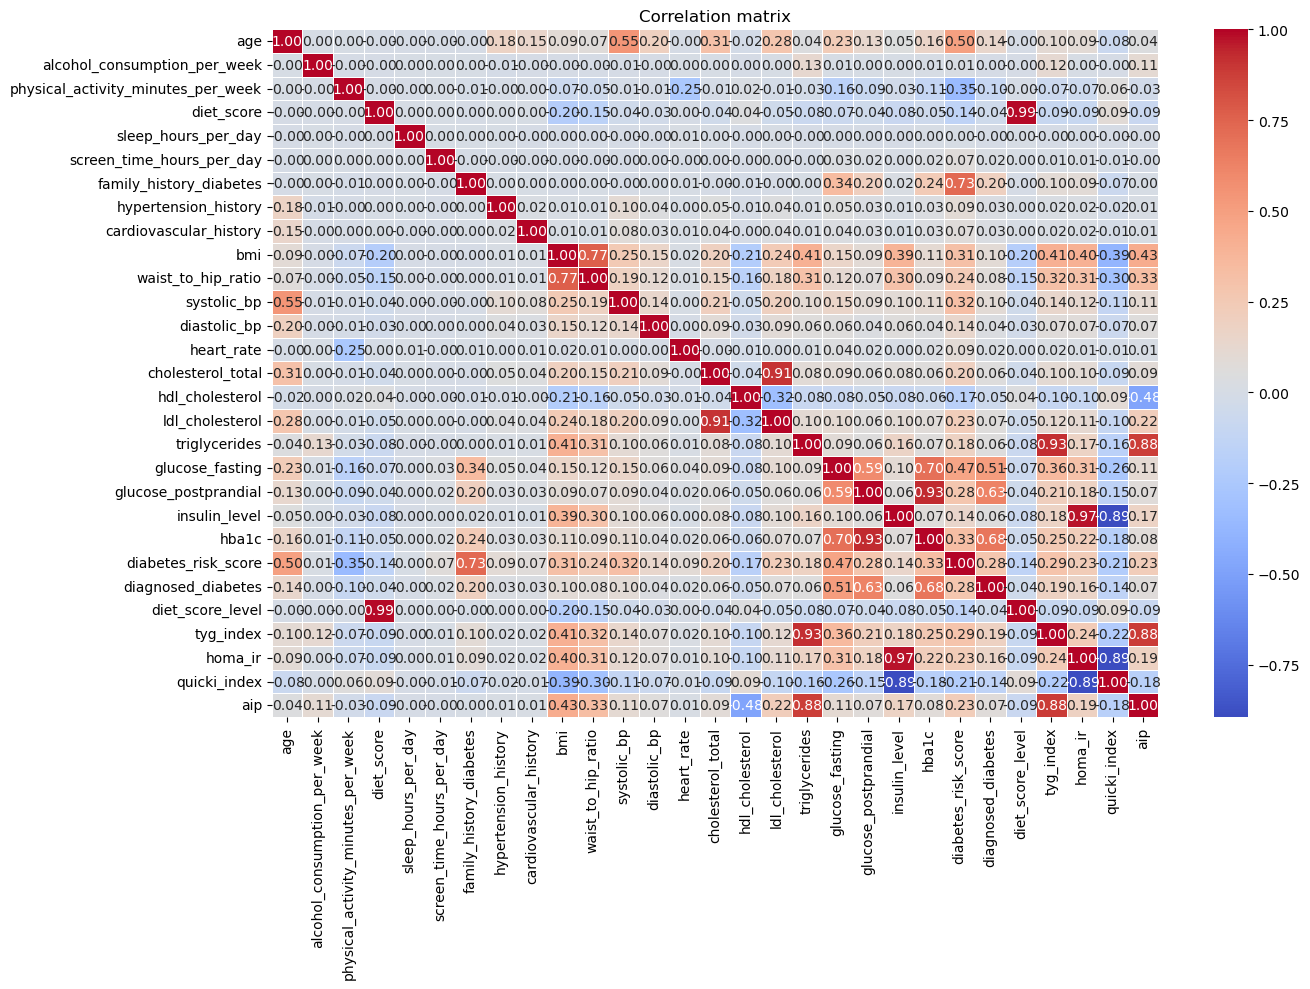


Top 5 Positive correlations with 'diabetes_risk_score':
family_history_diabetes    0.733081
age                        0.495923
glucose_fasting            0.469938
hba1c                      0.329924
systolic_bp                0.323617
Name: diabetes_risk_score, dtype: float64

Top 5 Negative correlations with 'diabetes_risk_score':
physical_activity_minutes_per_week   -0.348096
quicki_index                         -0.208330
hdl_cholesterol                      -0.174426
diet_score                           -0.144921
diet_score_level                     -0.143437
Name: diabetes_risk_score, dtype: float64


In [8]:
corr_matrix(df) 
top_corr(df, "diabetes_risk_score", 5)

The previously calculated biomarkers do not show significant levels of correlation with diabetes risk so we will work with highly correlating ones.

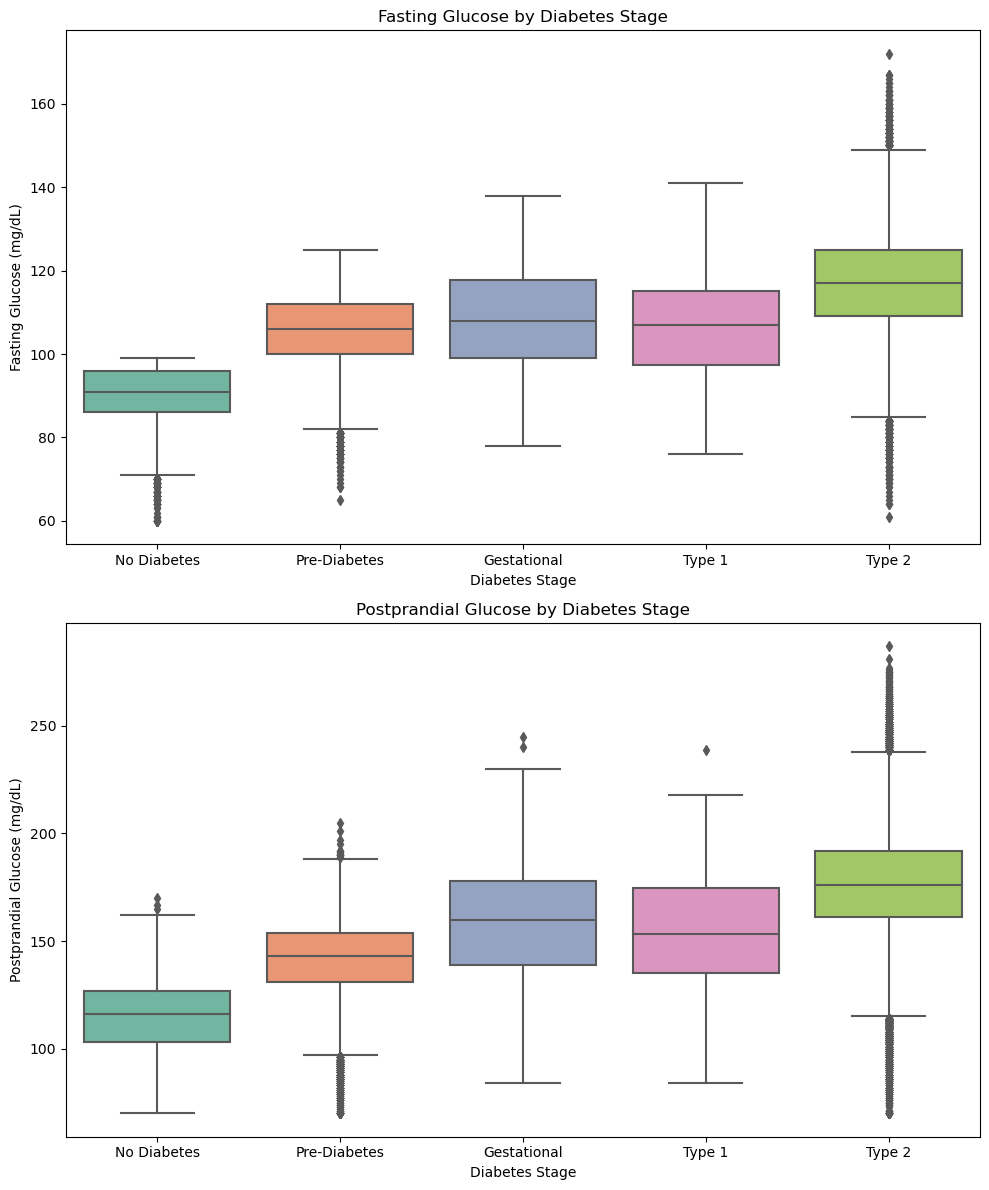

In [9]:
glucose_stage_box(df)

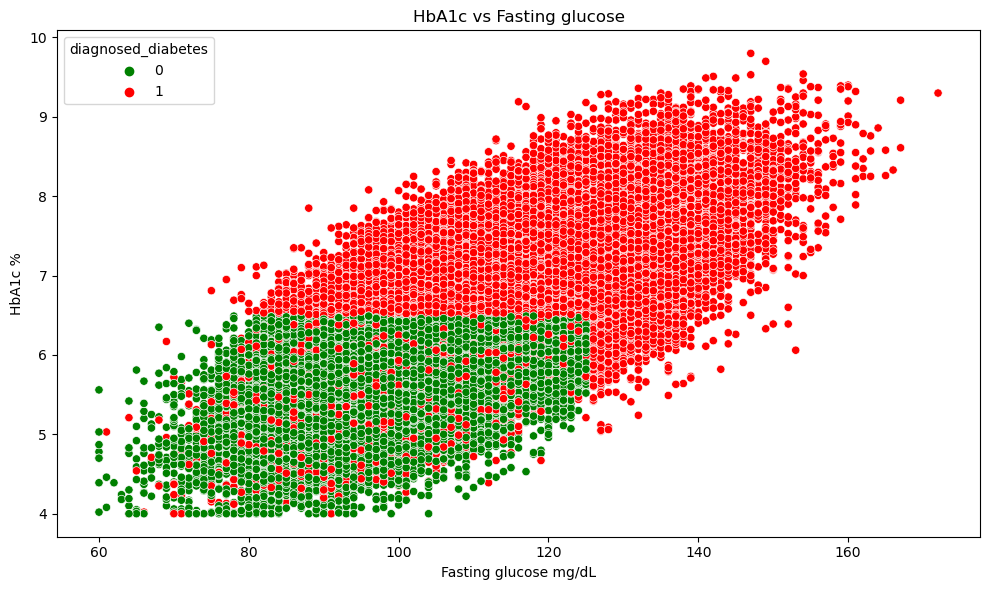

In [10]:
hba1c_fasting_scatter(df)

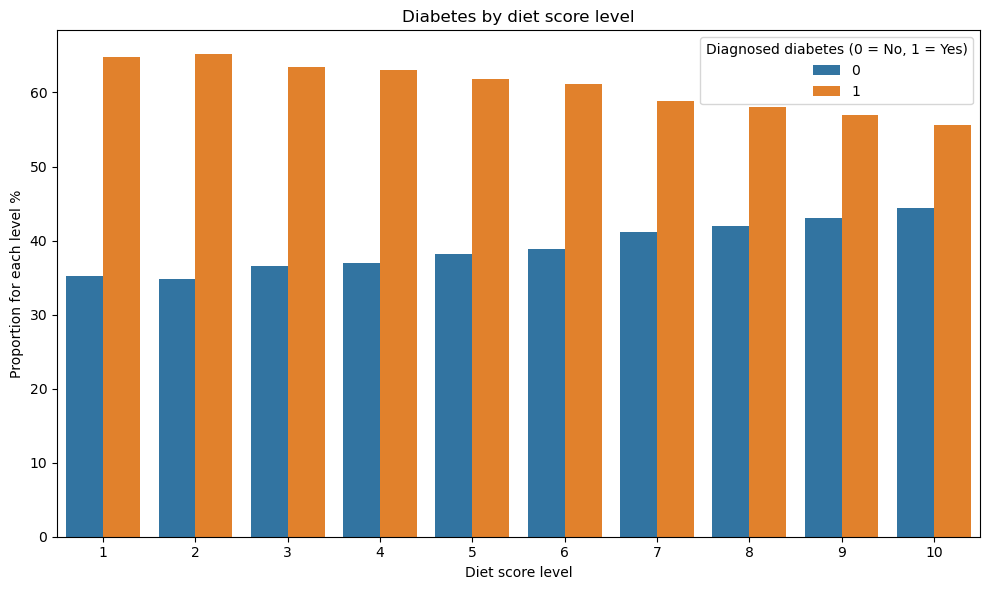

In [11]:
diet_diabetes_bar(df)

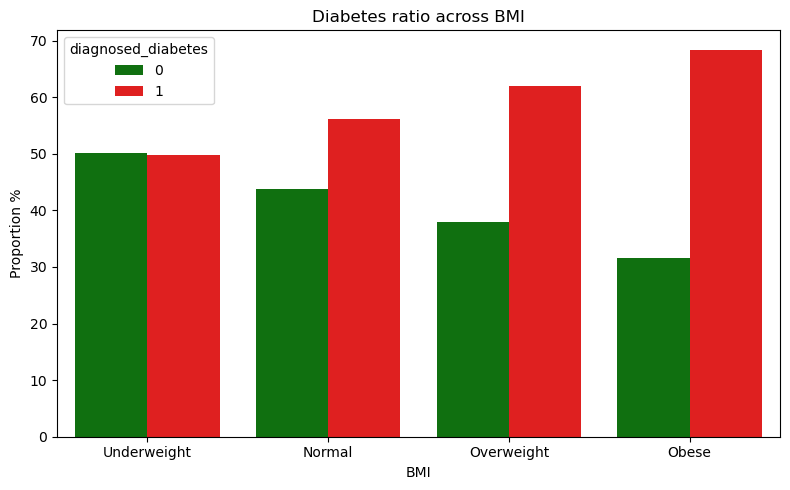

In [12]:
bmi_diabetes_bar(df)

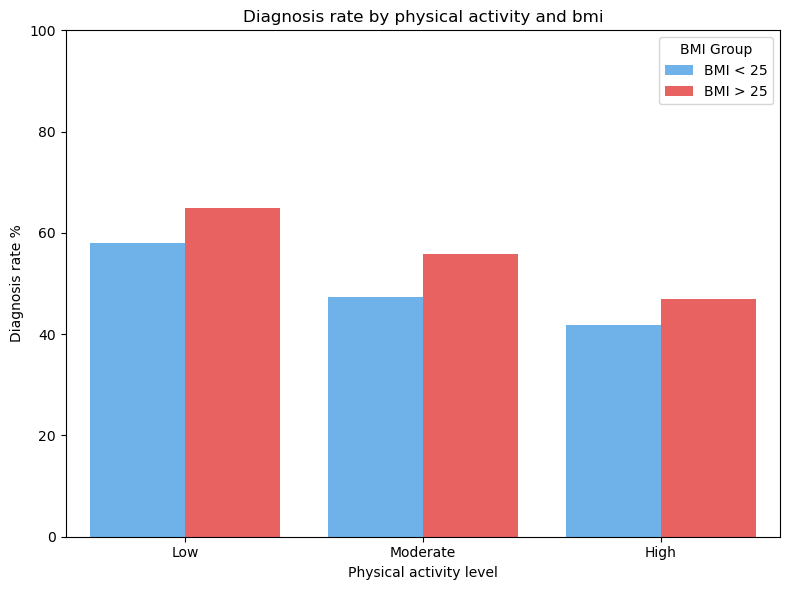

In [13]:
activity_bmi_bar(df)

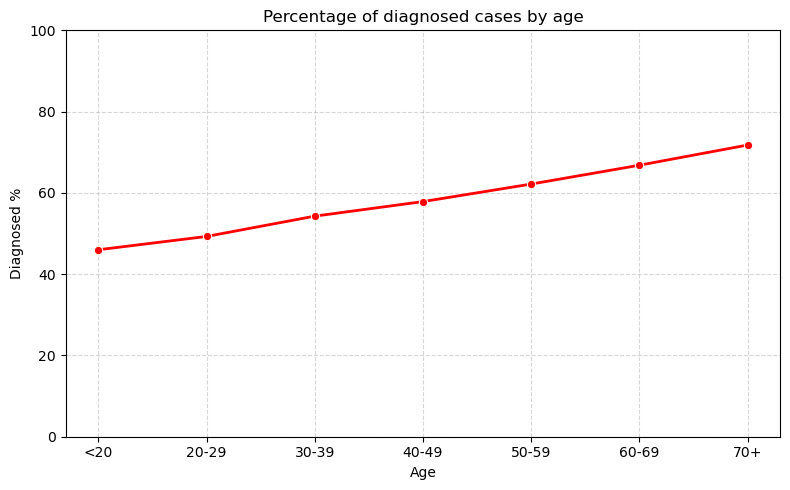

In [14]:
age_diabetes_line(df)

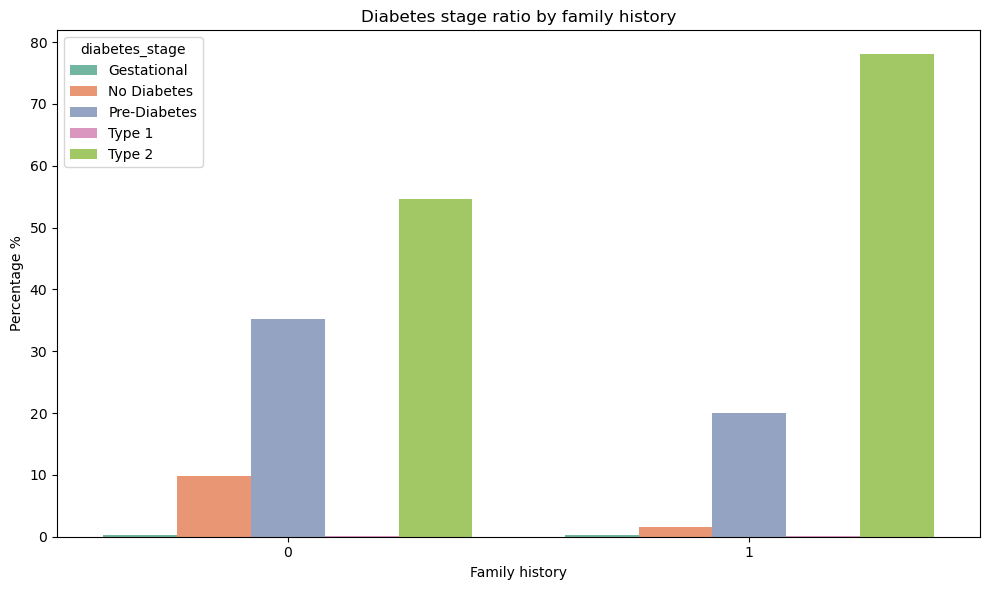

In [15]:
family_bar(df)  

People without diabetes tend to have much lower blood sugar levels, both when fasting and after meals. Those who are diagnosed usually show higher values for both fasting glucose and HbA1c. A healthier diet clearly helps reduce the risk, and the same goes for maintaining a lower body weight. Physical activity also makes a big difference — the more active and fit someone is, the less likely they are to develop diabetes. Additionally, family history and age both play major roles. People with a positive family history show a much higher chance of being struck with diabetes, while those without such history tend to fall into healthy or pre-diabetes, also the older someone gets, the higher their likelihood of being diagnosed, with diabetes rates steadily rising over time.

